# Student Performance Indicator

In this part we will focus on performing Exploratory Data Analysis (EDA)

To do so, we will:
1. Understand the problem
2. Collect the Data
3. Check key information about the Dataset
4. EDA

## 1. Problem Statement
Our goal is to study the impact of external variables such as gender, ethnicity, family etc on student's performance (test score).

## 2. Data Collection
- Dataset Source is available on [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- The data consists of 8 column (the external variables) and 1000 rows.

### 2.1 Important libraries and collect the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import data from csv files**

In [2]:
df = pd.read_csv("data/stud.csv")

**Check the dataset**

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

From the previous display of the df, here is some important infos regarding the different variables
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score (seems out of 100)
- reading score
- writing score

## 3.Check key information
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Missing values 

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Check duplicates 
Out of 1000 students, there are no duplicate. It could happen though ?

In [16]:
df.duplicated().sum()

0

#### Check datatypes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Check unique values in each column

In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Descriptive Stats

In [20]:
df.describe(include='all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


All *average scores* are around 66-69. 

The *standard deviation* is also pretty much the same, around 15.

Only `math_score` has a minimum score of 0.

#### Values of the categorical columns

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    print(col,": ", df[col].unique(),"\n")

gender :  ['female' 'male'] 

race_ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental_level_of_education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch :  ['standard' 'free/reduced'] 

test_preparation_course :  ['none' 'completed'] 



#### Feature Engineering - Add Average & Total Scores

In [31]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Count the number of maximum scores in each subject

In [39]:
count_max_math = df[df["math_score"]==100]["average_score"].count()
count_max_reading = df[df["reading_score"]==100]["average_score"].count()
count_max_writing = df[df["writing_score"]==100]["average_score"].count()

print(f"Number of students with max score on math {count_max_math}")
print(f"Number of students with max score on reading {count_max_reading}")
print(f"Number of students with max score on writing {count_max_writing}")

Number of students with max score on math 7
Number of students with max score on reading 17
Number of students with max score on writing 14


In [44]:
count_max_math = df[df["math_score"]<20]["average_score"].count()
count_max_reading = df[df["reading_score"]<20]["average_score"].count()
count_max_writing = df[df["writing_score"]<20]["average_score"].count()

print(f"Number of students with low score on math {count_max_math}")
print(f"Number of students with low score on reading {count_max_reading}")
print(f"Number of students with low score on writing {count_max_writing}")

Number of students with low score on math 4
Number of students with low score on reading 1
Number of students with low score on writing 3


We can see that math seems to be the subject where students have the most trouble with.

## 4. EDA - Data Visualization
Let's have a deeper observation through Data Visualisation

#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

**GENDER vs grades**

<AxesSubplot:xlabel='average_score', ylabel='Count'>

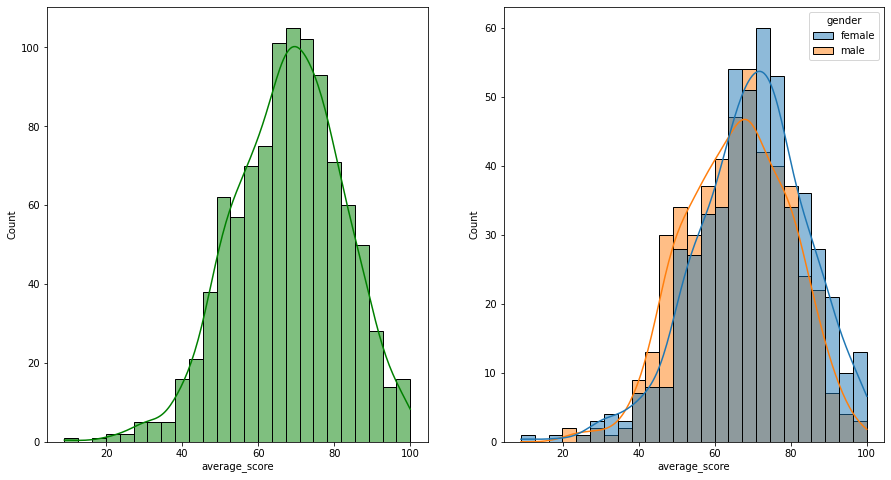

In [51]:
fig , axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df,x="average_score",bins=25,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",hue="gender",bins=25,kde=True)


<AxesSubplot:xlabel='total_score', ylabel='Count'>

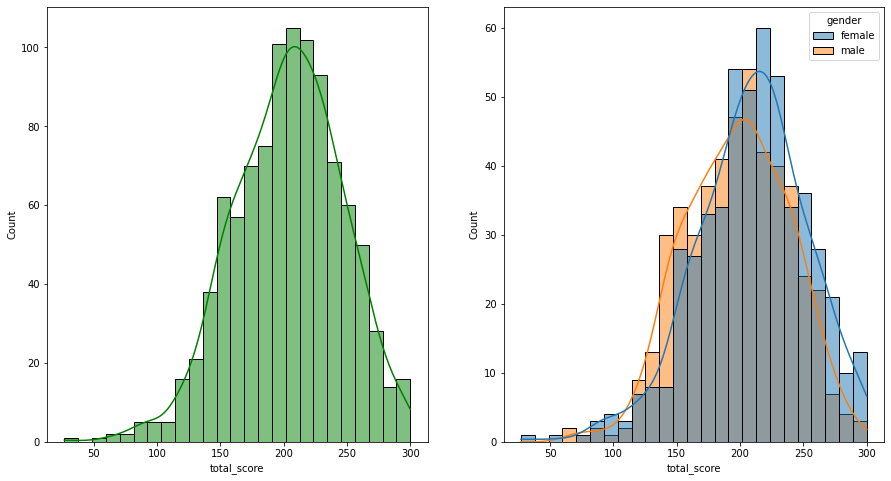

In [58]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df,x="total_score",bins=25,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="total_score",bins=25,kde=True,hue="gender")


This two hist plots give distribution of both average and total scores. From those two graphs, we can see that females have better grades in general.

**LUNCH IMPACT**

<AxesSubplot:xlabel='average_score', ylabel='Count'>

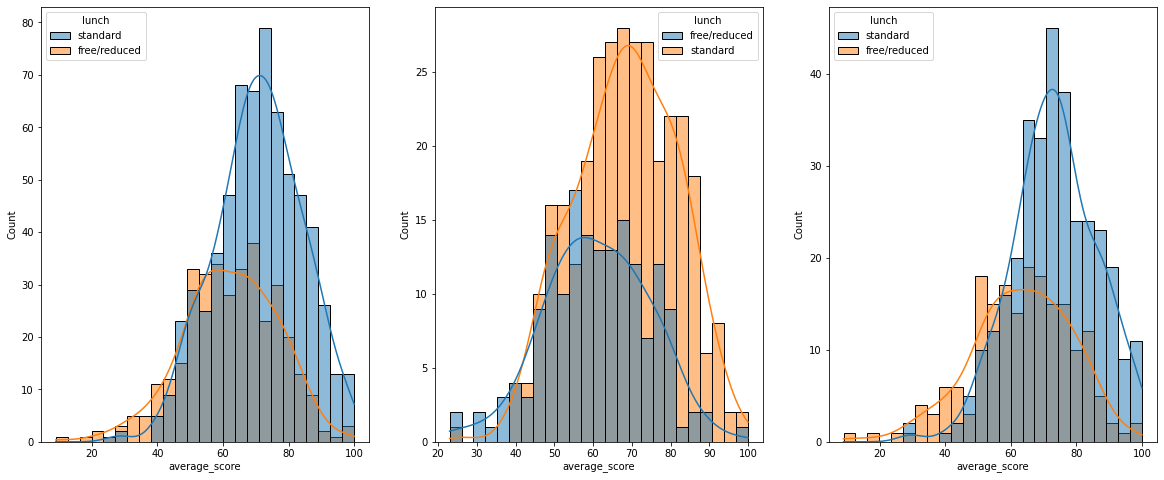

In [61]:
fig, axs = plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
sns.histplot(data=df,x="average_score",hue="lunch",kde=True,bins=25)
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average_score",hue="lunch",kde=True,bins=25)
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="female"],x="average_score",hue="lunch",kde=True,bins=25)


We can see that lunch have a big impact on the scores for both genders.

In [53]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


**Parent level of education**

<AxesSubplot:xlabel='average_score', ylabel='Count'>

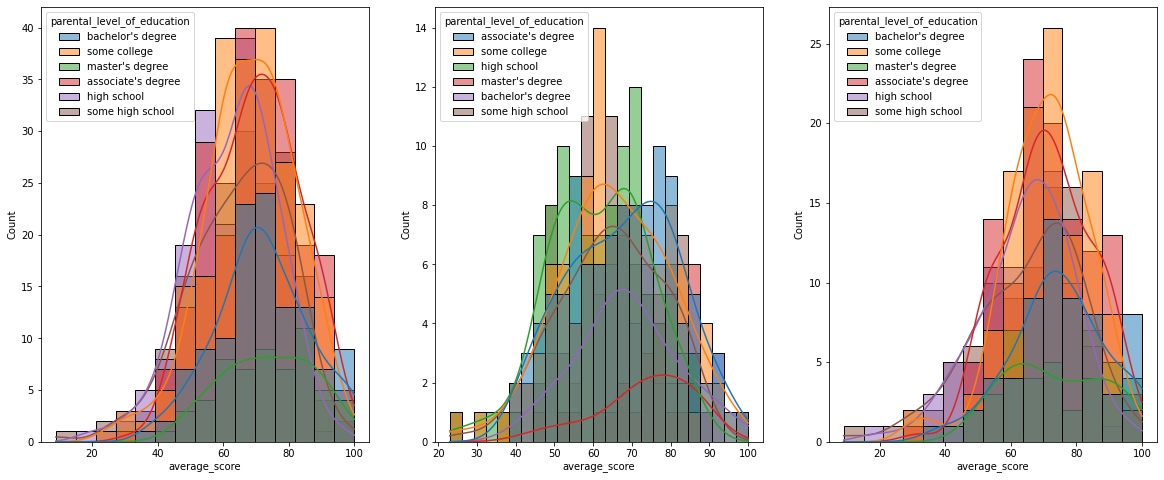

In [63]:
fig, axs = plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
sns.histplot(data=df,x="average_score",hue="parental_level_of_education",kde=True,bins=15)
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average_score",hue="parental_level_of_education",kde=True,bins=25)
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="female"],x="average_score",hue="parental_level_of_education",kde=True,bins=15)


**Ethnicity**

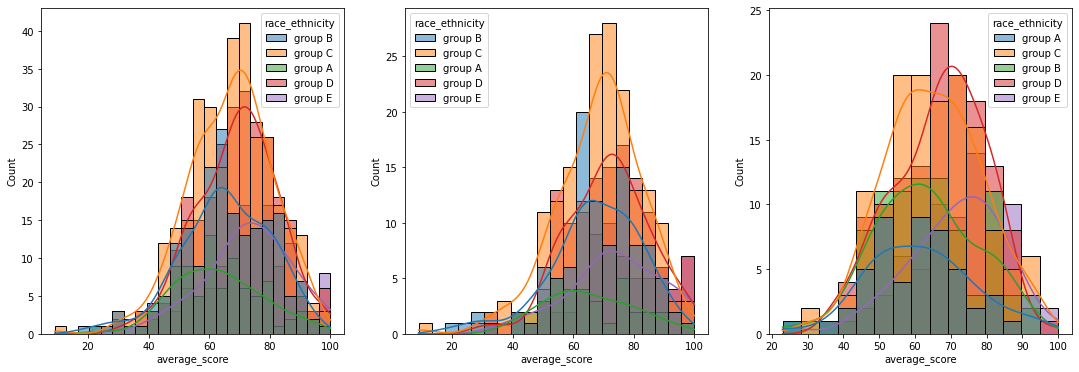

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#### 4.2 Maximum Scores for each subject

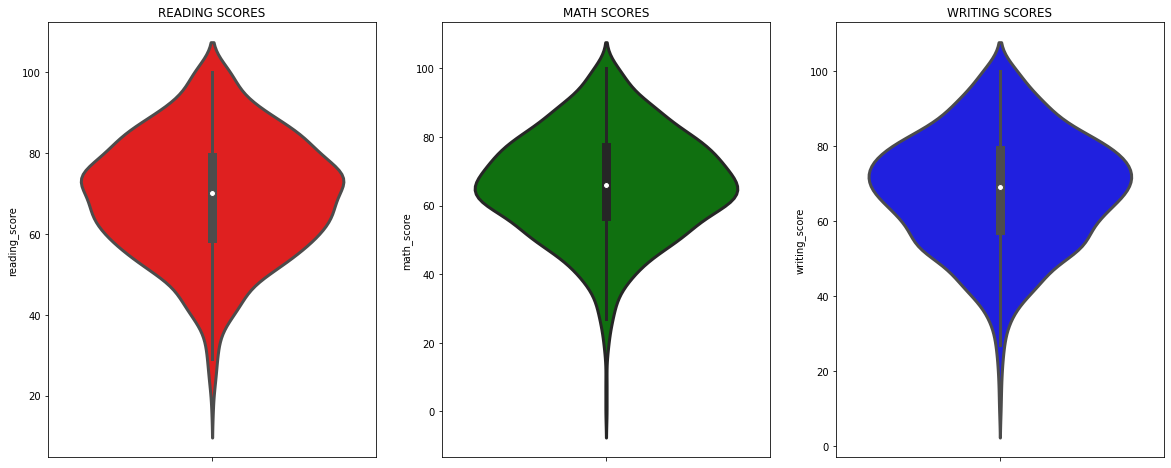

In [68]:
fig,axs = plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
plt.title("READING SCORES")
sns.violinplot(y="reading_score",data=df,color="red",linewidth=3)

plt.subplot(132)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='green',linewidth=3)

plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### 4.3 Multivariate analysis

In [72]:
gender=df['gender'].unique()

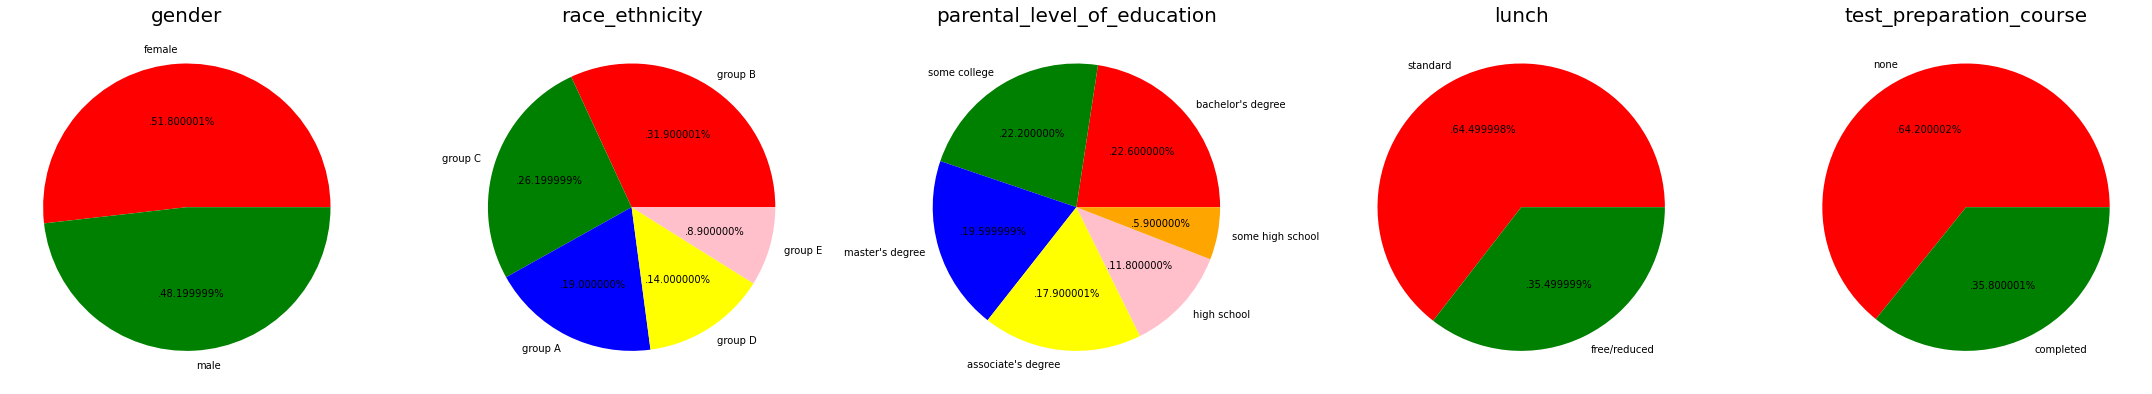

In [99]:
plt.rcParams['figure.figsize'] = (30, 30)
columns = ["gender","race_ethnicity","parental_level_of_education","lunch","test_preparation_course"]
i=1
for col in columns:
    plt.subplot(1,5,i)
    size = df[col].value_counts()
    labels = df[col].unique()
    color = ['red','green','blue','yellow','pink','orange']

    plt.pie(size,colors = color, labels = labels,autopct = '.%2f%%')
    plt.title(col, fontsize = 20)
    plt.axis('off')
    i+=1
plt.tight_layout()
plt.grid()



#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

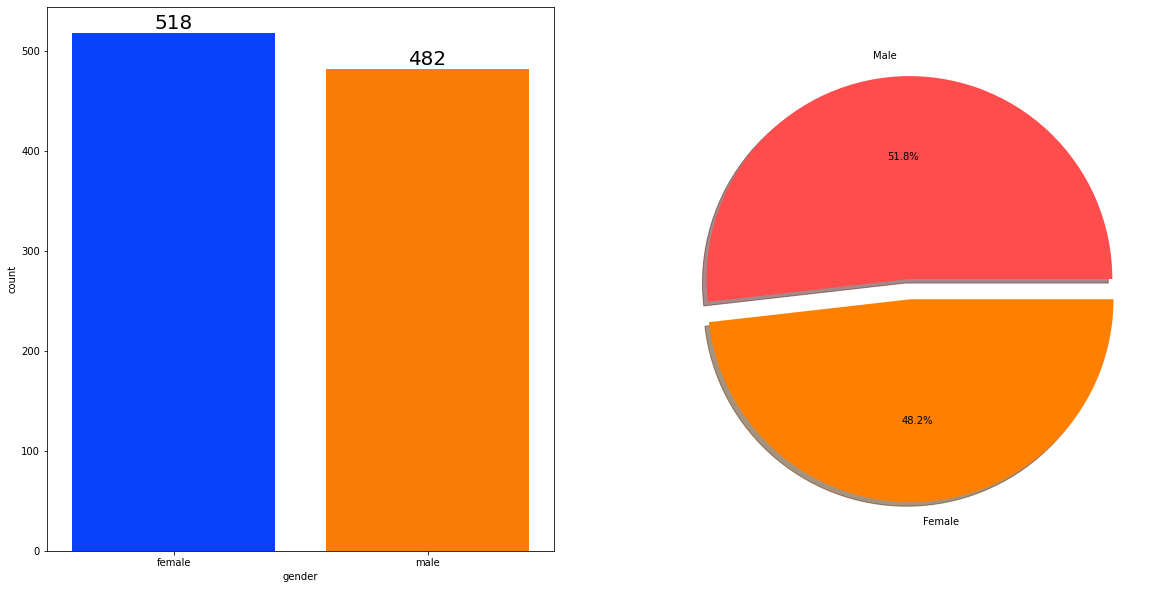

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [101]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


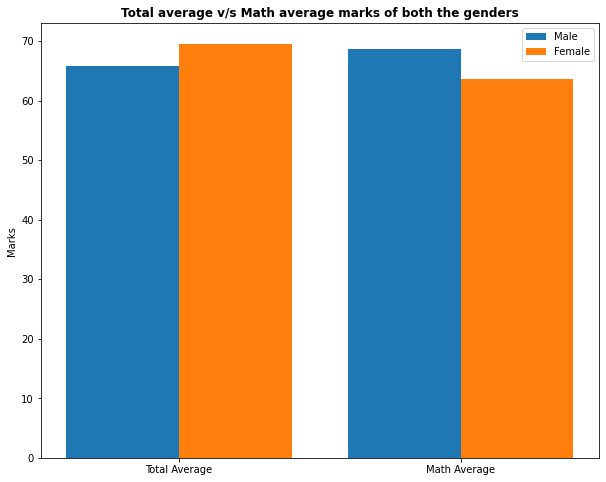

In [104]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

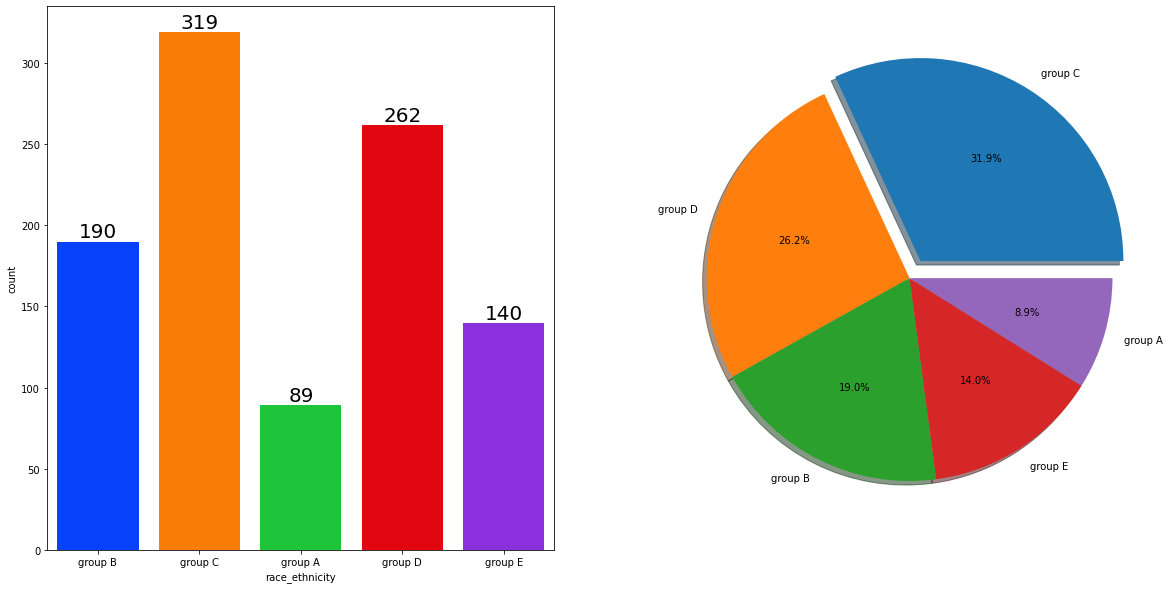

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

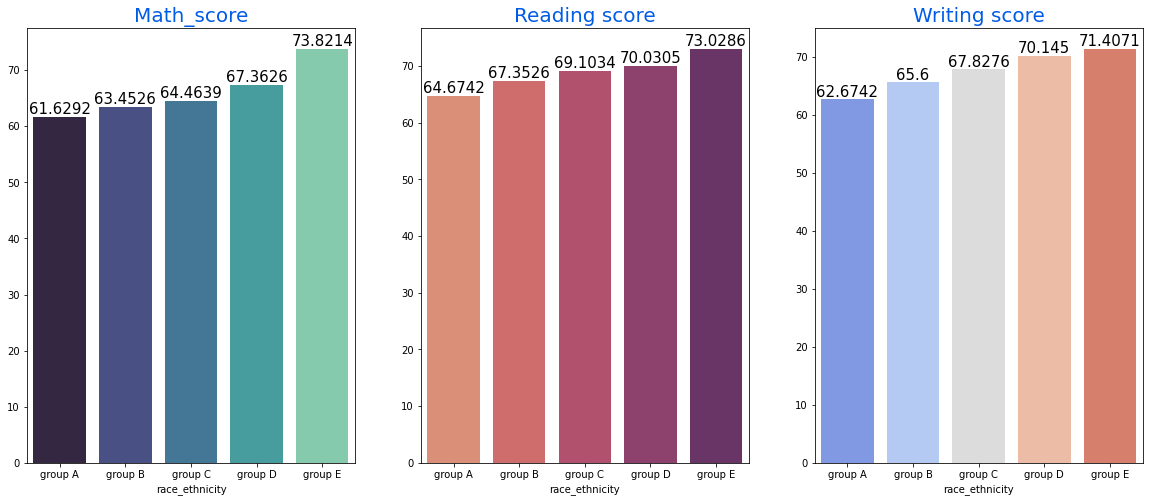

In [108]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

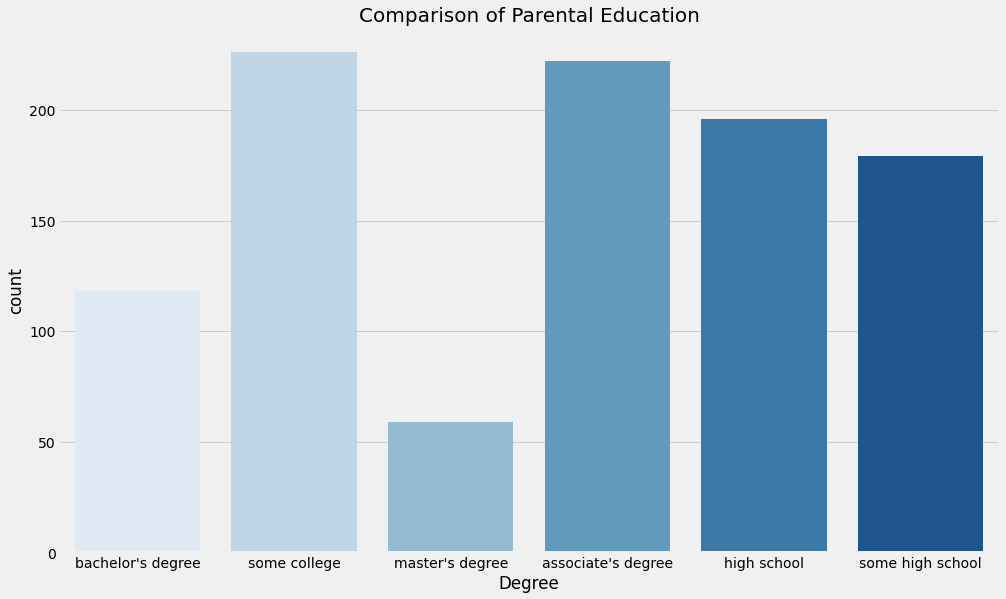

In [111]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

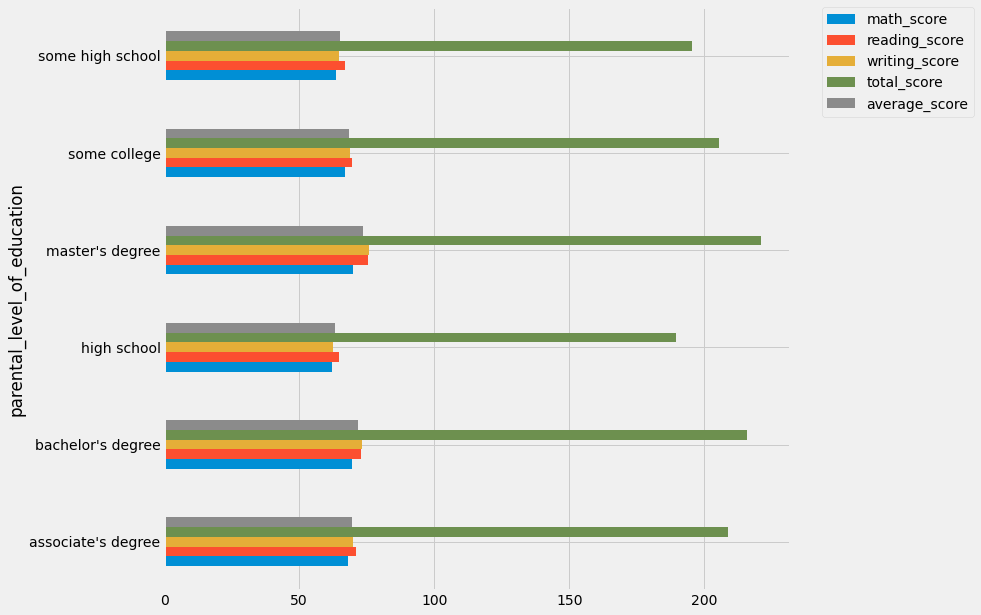

In [110]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

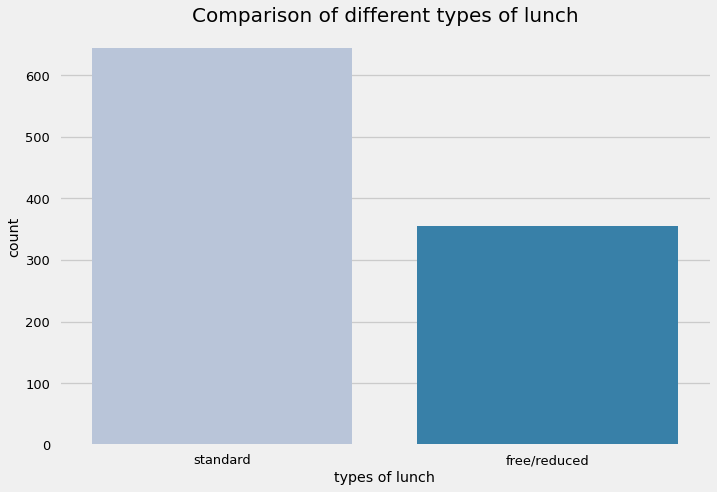

In [112]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

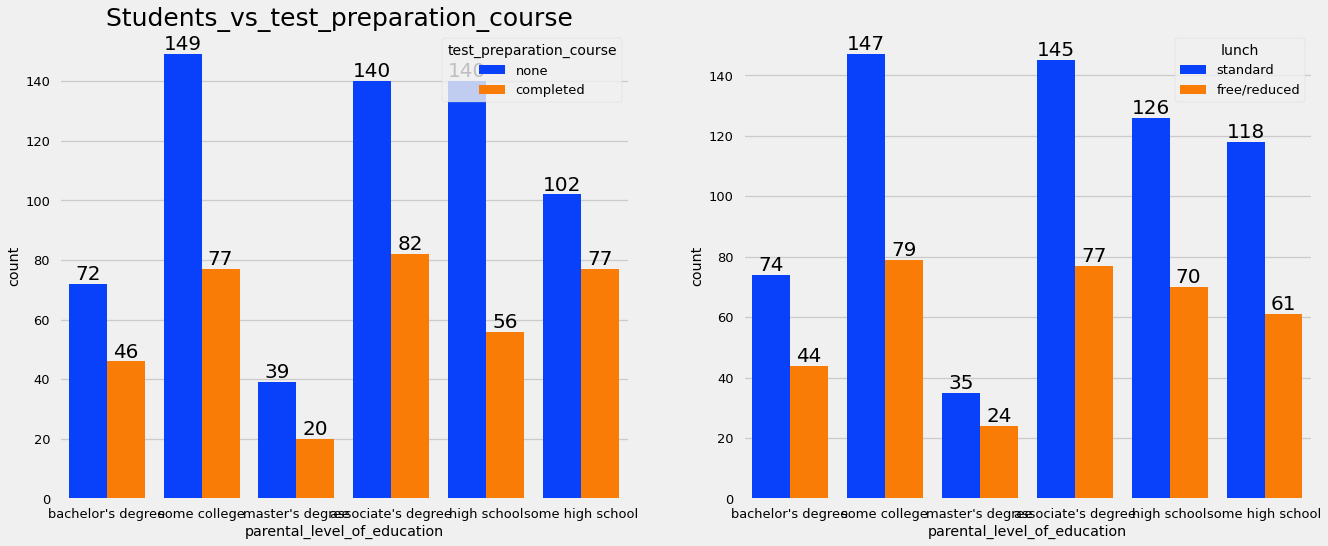

In [114]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students_vs_test_preparation_course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

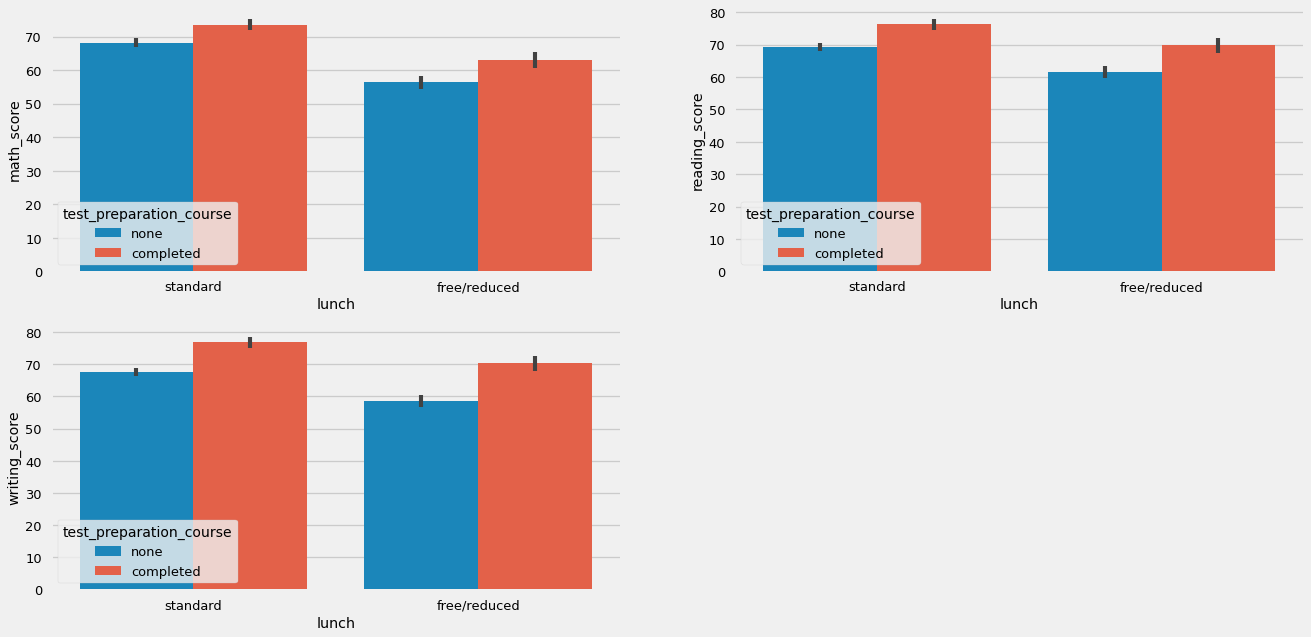

In [118]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

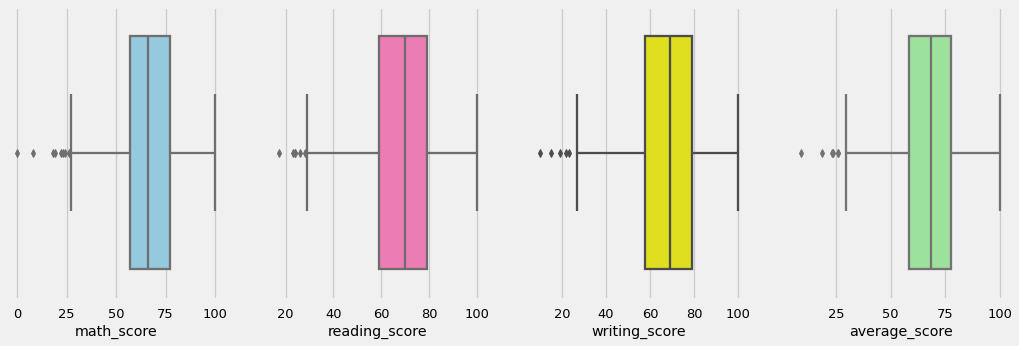

In [120]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

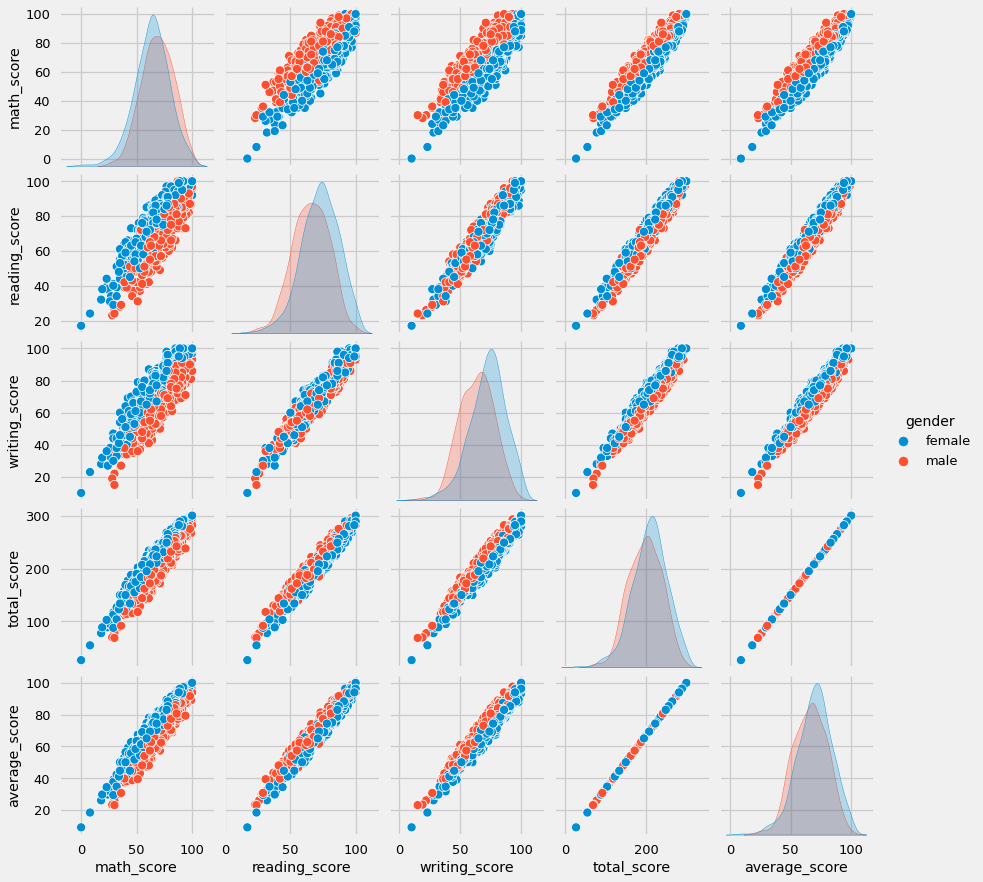

In [121]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.